In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:
# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\samik\Desktop\viit\bootcamp\Housing (1).csv")

In [40]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
# Step 2: Exploratory Data Analysis (EDA)
# Print statistical summary and info to understand the dataset
print(df.describe())  

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [42]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [43]:
# Step 3: Correlation matrix visualization (only for numeric columns)
# Filter numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [44]:
numeric_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


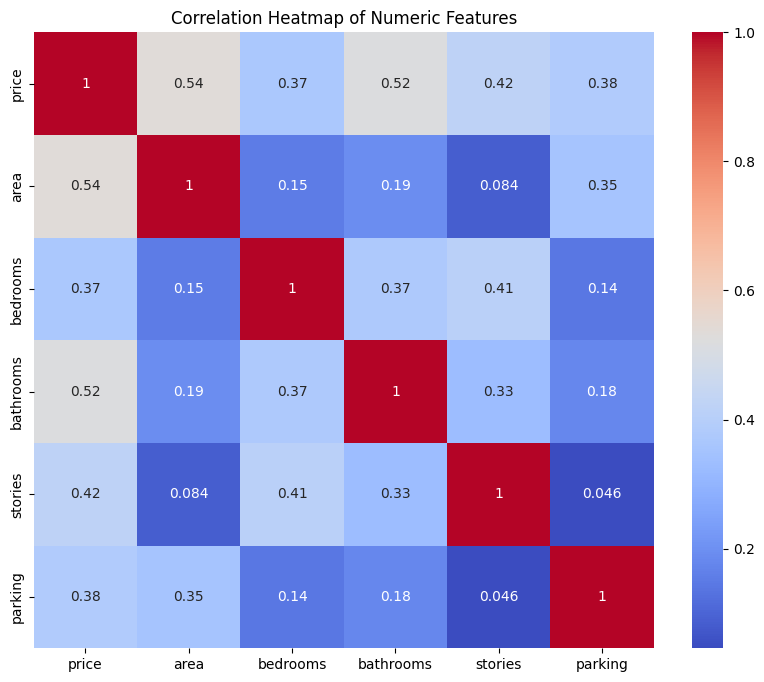

In [45]:
# Plot heatmap for numeric columns correlation
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [46]:
# Step 4: Data Preprocessing

# Identify numerical and categorical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Define target variable
target = 'price'

# Split the data into features (X) and target (y)
X = df.drop(columns=target)
y = df[target]

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
numerical_features


['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [48]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'furnishingstatus']

In [49]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [50]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [51]:
X_train, X_test, y_train, y_test

(     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 46   6000         3          2        4      yes        no       no   
 93   7200         3          2        1      yes        no      yes   
 335  3816         2          1        1      yes        no      yes   
 412  2610         3          1        2      yes        no      yes   
 471  3750         3          1        2      yes        no       no   
 ..    ...       ...        ...      ...      ...       ...      ...   
 71   6000         4          2        4      yes        no       no   
 106  5450         4          2        1      yes        no      yes   
 270  4500         3          2        3      yes        no       no   
 435  4040         2          1        1      yes        no       no   
 102  5500         3          2        4      yes       yes       no   
 
     hotwaterheating airconditioning  parking prefarea furnishingstatus  
 46               no             yes        1       no      

In [52]:

# Step 5: Build a pre-processing pipeline for numerical and categorical features
numerical_transformer = StandardScaler()  # Standardize numeric features
categorical_transformer = OneHotEncoder()  # One-hot encode categorical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['area', 'bedrooms', 'bathrooms', 'stories',
                                  'parking']),
                                ('cat', OneHotEncoder(),
                                 ['mainroad', 'guestroom', 'basement',
                                  'hotwaterheating', 'airconditioning',
                                  'furnishingstatus'])])

In [53]:

# Show the original training data (Before Preprocessing)
print("Original Data (Before Preprocessing):")
print(X_train.head())  # Display first 5 rows of raw training data

# Build a pre-processing pipeline for numerical and categorical features
numerical_transformer = StandardScaler()  # Standardize numeric features
categorical_transformer = OneHotEncoder(sparse_output=False)  # One-hot encode categorical features

# Create the preprocessor to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Convert the processed data back into a DataFrame for visualization purposes
# Get column names for the processed data (numerical are unchanged; categorical are one-hot encoded)
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
processed_columns = numerical_features + list(cat_feature_names)

# Convert to DataFrame for better readability
X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_columns)

# Show the processed data (After Preprocessing)
print("\nProcessed Data (After Preprocessing):")
print(X_train_processed_df.head())  # Display first 5 rows of processed training data


Original Data (Before Preprocessing):
     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
46   6000         3          2        4      yes        no       no   
93   7200         3          2        1      yes        no      yes   
335  3816         2          1        1      yes        no      yes   
412  2610         3          1        2      yes        no      yes   
471  3750         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
46               no             yes        1       no        furnished  
93               no             yes        3       no   semi-furnished  
335              no             yes        2       no        furnished  
412              no              no        0      yes      unfurnished  
471              no              no        0       no      unfurnished  

Processed Data (After Preprocessing):
       area  bedrooms  bathrooms   stories   parking  main

In [54]:
# Step 6: Create a pipeline with preprocessing and Linear Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'furnishingstatus'])])),
                ('model', LinearRegression())])

In [55]:
# Step 7: Train the model
model_pipeline.fit(X_train, y_train)
print("Model has been fitted successfully.")


Model has been fitted successfully.


In [56]:

# Step 8: Predict on test data
y_pred = model_pipeline.predict(X_test)
y_pred

array([5258925.99541617, 6718130.93548689, 3206390.61078682,
       4746637.3331803 , 3417109.03607653, 3688532.64426648,
       5821903.98698923, 5998970.73111102, 2722897.05312343,
       2604646.13552249, 9123702.93576609, 2886443.41171829,
       3134456.01977448, 3463046.68812161, 3883767.03358579,
       5205836.27646808, 3094402.64909844, 4934276.69762258,
       4587021.22230964, 3701879.6875537 , 5265993.32138883,
       5568826.19292355, 2814395.2551476 , 4346622.371208  ,
       5539146.03442004, 7202583.02894949, 3437632.7642189 ,
       5398110.73586203, 7895446.458134  , 3480358.76570769,
       6035959.57685419, 3410164.98146621, 6869572.93591008,
       4358864.08644593, 3698347.63676932, 5928918.32132236,
       5081631.13271761, 4577887.6355521 , 3171570.78992646,
       4677498.10467742, 4756189.98912228, 3605638.17867786,
       6697906.89153723, 4109495.48286034, 3891480.09958185,
       4403692.57341578, 6862300.25259125, 4185359.05934612,
       3926970.47292874,

In [57]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1837637189871.7087
Mean Absolute Error (MAE): 988116.1632405713
R-squared (R2): 0.6364404686639458


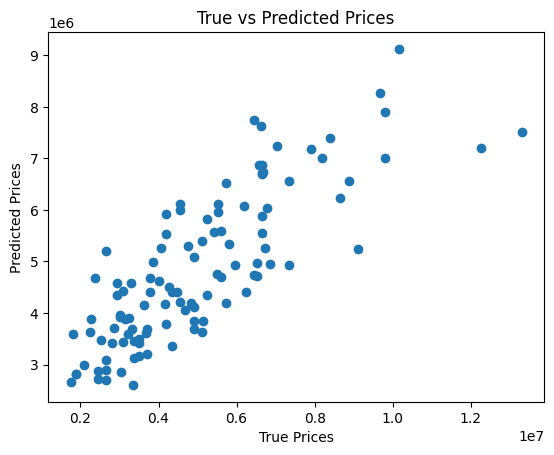

In [58]:
# Step 10: Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices")
plt.show()
